<a href="https://colab.research.google.com/github/TobyChen320/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/Toby_LS_DS_432_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [6]:
from google.colab import files
uploaded = files.upload()

Saving quickdraw10.npz to quickdraw10.npz


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=.2)
  return X_train, y_train, X_test, y_test

In [8]:
X_train, X_test, y_train, y_test = load_quickdraw10('quickdraw10.npz')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 784)
(80000,)
(20000, 784)
(20000,)


### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [9]:
##### Your Code Here #####
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
def create_model(lr=0.001):
  opt = Adam(learning_rate=lr)
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [10]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [11]:
model = create_model()

bt_default = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=32,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
2500/2500 [==============================] - 6s 2ms/step - loss: 2.0616 - accuracy: 0.3956 - val_loss: 1.3919 - val_accuracy: 0.4823
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.2850 - accuracy: 0.5368 - val_loss: 1.2433 - val_accuracy: 0.5773
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1769 - accuracy: 0.5983 - val_loss: 1.1553 - val_accuracy: 0.6182
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1277 - accuracy: 0.6190 - val_loss: 1.1239 - val_accuracy: 0.6187
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1043 - accuracy: 0.6240 - val_loss: 1.1520 - val_accuracy: 0.6176
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0763 - accuracy: 0.6357 - val_loss: 1.0805 - val_accuracy: 0.6323
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0469 - accuracy: 0.6457 - val_loss: 1.0602 - val_accuracy:

In [12]:
model = create_model()

bt_small = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=8,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
10000/10000 [==============================] - 21s 2ms/step - loss: 1.8902 - accuracy: 0.3976 - val_loss: 1.5373 - val_accuracy: 0.4762
Epoch 2/30
10000/10000 [==============================] - 20s 2ms/step - loss: 1.4218 - accuracy: 0.4806 - val_loss: 1.4023 - val_accuracy: 0.5028
Epoch 3/30
10000/10000 [==============================] - 20s 2ms/step - loss: 1.3114 - accuracy: 0.5240 - val_loss: 1.2360 - val_accuracy: 0.5559
Epoch 4/30
10000/10000 [==============================] - 20s 2ms/step - loss: 1.1802 - accuracy: 0.5672 - val_loss: 1.1541 - val_accuracy: 0.5724
Epoch 5/30
10000/10000 [==============================] - 20s 2ms/step - loss: 1.1003 - accuracy: 0.6019 - val_loss: 1.0775 - val_accuracy: 0.6322
Epoch 6/30
10000/10000 [==============================] - 20s 2ms/step - loss: 1.0027 - accuracy: 0.6618 - val_loss: 0.9966 - val_accuracy: 0.6892
Epoch 7/30
10000/10000 [==============================] - 20s 2ms/step - loss: 0.9490 - accuracy: 0.7018 - val_loss: 0

In [13]:
model = create_model()

bt_large = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=512,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
157/157 [==============================] - 1s 4ms/step - loss: 6.7387 - accuracy: 0.1735 - val_loss: 2.1024 - val_accuracy: 0.2111
Epoch 2/30
157/157 [==============================] - 0s 3ms/step - loss: 1.9862 - accuracy: 0.2613 - val_loss: 1.8948 - val_accuracy: 0.2887
Epoch 3/30
157/157 [==============================] - 0s 3ms/step - loss: 1.8045 - accuracy: 0.3288 - val_loss: 1.7505 - val_accuracy: 0.3503
Epoch 4/30
157/157 [==============================] - 0s 3ms/step - loss: 1.6849 - accuracy: 0.3726 - val_loss: 1.6718 - val_accuracy: 0.3925
Epoch 5/30
157/157 [==============================] - 0s 3ms/step - loss: 1.5999 - accuracy: 0.4017 - val_loss: 1.5920 - val_accuracy: 0.3947
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 1.5413 - accuracy: 0.4154 - val_loss: 1.5383 - val_accuracy: 0.4151
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 1.4938 - accuracy: 0.4309 - val_loss: 1.4929 - val_accuracy: 0.4275
Epoch 

In [14]:
model = create_model()

bt_large_1000 = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=1000,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
80/80 [==============================] - 0s 4ms/step - loss: 9.7427 - accuracy: 0.2272 - val_loss: 2.1100 - val_accuracy: 0.2445
Epoch 2/30
80/80 [==============================] - 0s 3ms/step - loss: 2.0214 - accuracy: 0.2793 - val_loss: 1.9443 - val_accuracy: 0.3054
Epoch 3/30
80/80 [==============================] - 0s 3ms/step - loss: 1.8230 - accuracy: 0.3634 - val_loss: 1.7239 - val_accuracy: 0.4099
Epoch 4/30
80/80 [==============================] - 0s 3ms/step - loss: 1.6217 - accuracy: 0.4407 - val_loss: 1.5734 - val_accuracy: 0.4595
Epoch 5/30
80/80 [==============================] - 0s 3ms/step - loss: 1.4979 - accuracy: 0.4897 - val_loss: 1.4762 - val_accuracy: 0.5110
Epoch 6/30
80/80 [==============================] - 0s 3ms/step - loss: 1.4021 - accuracy: 0.5232 - val_loss: 1.4218 - val_accuracy: 0.5195
Epoch 7/30
80/80 [==============================] - 0s 3ms/step - loss: 1.3414 - accuracy: 0.5397 - val_loss: 1.3704 - val_accuracy: 0.5254
Epoch 8/30
80/80 [==

In [15]:
model = create_model()

bt_small_16 = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.8030 - accuracy: 0.4461 - val_loss: 1.2878 - val_accuracy: 0.5663
Epoch 2/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.2022 - accuracy: 0.5896 - val_loss: 1.1577 - val_accuracy: 0.6213
Epoch 3/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.0804 - accuracy: 0.6364 - val_loss: 1.0580 - val_accuracy: 0.6532
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.9772 - accuracy: 0.6860 - val_loss: 0.9229 - val_accuracy: 0.7024
Epoch 5/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.8780 - accuracy: 0.7261 - val_loss: 0.8737 - val_accuracy: 0.7366
Epoch 6/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.8242 - accuracy: 0.7503 - val_loss: 0.8294 - val_accuracy: 0.7506
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.7992 - accuracy: 0.7586 - val_loss: 0.8275 - val_ac

In [16]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large, bt_large_1000, bt_small_16], ["32_", "8_", "512_", "1000_", "16_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,2.061635,0.395638,1.391887,0.48230,0,32_
1,1.284994,0.536788,1.243297,0.57730,1,32_
2,1.176879,0.598300,1.155328,0.61820,2,32_
3,1.127681,0.618988,1.123921,0.61875,3,32_
4,1.104294,0.624000,1.152002,0.61760,4,32_


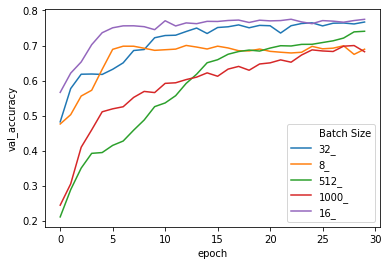

In [17]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [25]:
model = create_model(lr=1)

bt_lr_1 = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 10s 2ms/step - loss: 234.9316 - accuracy: 0.1001 - val_loss: 3.3072 - val_accuracy: 0.0988
Epoch 2/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.4684 - accuracy: 0.0981 - val_loss: 3.4562 - val_accuracy: 0.1003
Epoch 3/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.4722 - accuracy: 0.1002 - val_loss: 3.3663 - val_accuracy: 0.1006
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.4634 - accuracy: 0.1001 - val_loss: 3.2514 - val_accuracy: 0.1001
Epoch 5/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.4625 - accuracy: 0.1001 - val_loss: 3.2409 - val_accuracy: 0.1003
Epoch 6/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.4648 - accuracy: 0.1009 - val_loss: 3.2567 - val_accuracy: 0.0988
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.4693 - accuracy: 0.1019 - val_loss: 3.1946 - val_

In [26]:
model = create_model(lr=.1)

bt_lr_0_1 = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 10s 2ms/step - loss: 4.1904 - accuracy: 0.1015 - val_loss: 2.3126 - val_accuracy: 0.1001
Epoch 2/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3223 - accuracy: 0.0997 - val_loss: 2.3195 - val_accuracy: 0.0971
Epoch 3/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3209 - accuracy: 0.0994 - val_loss: 2.3234 - val_accuracy: 0.1001
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3200 - accuracy: 0.1000 - val_loss: 2.3178 - val_accuracy: 0.0988
Epoch 5/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3219 - accuracy: 0.0985 - val_loss: 2.3264 - val_accuracy: 0.0986
Epoch 6/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3207 - accuracy: 0.1004 - val_loss: 2.3192 - val_accuracy: 0.1010
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3211 - accuracy: 0.0991 - val_loss: 2.3244 - val_ac

In [27]:
model = create_model(lr=.01)

bt_lr_0_0_1 = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.1861 - accuracy: 0.2126 - val_loss: 2.0065 - val_accuracy: 0.1894
Epoch 2/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.0192 - accuracy: 0.1856 - val_loss: 2.0184 - val_accuracy: 0.1920
Epoch 3/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.0495 - accuracy: 0.1806 - val_loss: 2.0155 - val_accuracy: 0.1898
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.9976 - accuracy: 0.1876 - val_loss: 1.9985 - val_accuracy: 0.1768
Epoch 5/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.0059 - accuracy: 0.1859 - val_loss: 1.9951 - val_accuracy: 0.1895
Epoch 6/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.9927 - accuracy: 0.1902 - val_loss: 1.9911 - val_accuracy: 0.1902
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.9969 - accuracy: 0.1876 - val_loss: 1.9979 - val_ac

In [28]:
model = create_model(lr=.001)

bt_lr_0_0_0_1 = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.8481 - accuracy: 0.4821 - val_loss: 1.2306 - val_accuracy: 0.6016
Epoch 2/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.1635 - accuracy: 0.6137 - val_loss: 1.2132 - val_accuracy: 0.6118
Epoch 3/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.0416 - accuracy: 0.6501 - val_loss: 1.0220 - val_accuracy: 0.6485
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.9570 - accuracy: 0.6831 - val_loss: 0.9404 - val_accuracy: 0.7013
Epoch 5/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.8918 - accuracy: 0.7117 - val_loss: 0.9034 - val_accuracy: 0.7063
Epoch 6/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.8554 - accuracy: 0.7232 - val_loss: 0.8789 - val_accuracy: 0.7230
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.8364 - accuracy: 0.7311 - val_loss: 0.8527 - val_ac

In [29]:
model = create_model(lr=.0001)

bt_lr_0_0_0_0_1 = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 11s 2ms/step - loss: 5.2257 - accuracy: 0.2902 - val_loss: 1.7780 - val_accuracy: 0.3839
Epoch 2/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.5605 - accuracy: 0.4579 - val_loss: 1.4053 - val_accuracy: 0.5288
Epoch 3/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.2536 - accuracy: 0.5970 - val_loss: 1.2168 - val_accuracy: 0.6162
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.0961 - accuracy: 0.6591 - val_loss: 1.0943 - val_accuracy: 0.6707
Epoch 5/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.0038 - accuracy: 0.6876 - val_loss: 1.0275 - val_accuracy: 0.6948
Epoch 6/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.9496 - accuracy: 0.7053 - val_loss: 0.9907 - val_accuracy: 0.7061
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 0.9121 - accuracy: 0.7173 - val_loss: 0.9730 - val_ac

In [31]:
for exp, result in zip([bt_lr_1, bt_lr_0_1, bt_lr_0_0_1, bt_lr_0_0_0_1, bt_lr_0_0_0_0_1], ["1_", ".1_", ".01_", ".001_", ".0001_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size,Learning Rate
0,2.061635,0.395638,1.391887,0.48230,0,32_,nan
1,1.284994,0.536788,1.243297,0.57730,1,32_,nan
2,1.176879,0.598300,1.155328,0.61820,2,32_,nan
3,1.127681,0.618988,1.123921,0.61875,3,32_,nan
4,1.104294,0.624000,1.152002,0.61760,4,32_,nan


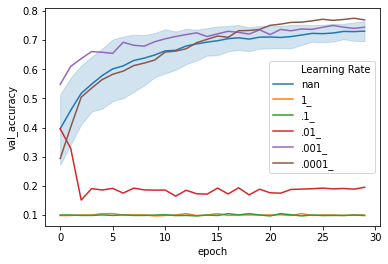

In [30]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [37]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Ftrl
def create_model2(lr=0.001):
  opt = SGD(learning_rate=lr)
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = create_model2(lr=.0001)

SGD = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.8718 - accuracy: 0.2591 - val_loss: 1.8952 - val_accuracy: 0.3067
Epoch 2/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.7416 - accuracy: 0.3586 - val_loss: 1.6464 - val_accuracy: 0.3775
Epoch 3/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.5494 - accuracy: 0.4299 - val_loss: 1.5370 - val_accuracy: 0.4503
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.4691 - accuracy: 0.4675 - val_loss: 1.4680 - val_accuracy: 0.4899
Epoch 5/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.4058 - accuracy: 0.4971 - val_loss: 1.4241 - val_accuracy: 0.4967
Epoch 6/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.3568 - accuracy: 0.5175 - val_loss: 1.4018 - val_accuracy: 0.5084
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.3166 - accuracy: 0.5315 - val_loss: 1.3619 - val_ac

In [38]:
def create_model3(lr=0.001):
  opt = Adadelta(learning_rate=lr)
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = create_model3(lr=.0001)

Adadelta = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 10s 2ms/step - loss: 120.8875 - accuracy: 0.0465 - val_loss: 112.9792 - val_accuracy: 0.0461
Epoch 2/30
5000/5000 [==============================] - 10s 2ms/step - loss: 106.7710 - accuracy: 0.0467 - val_loss: 100.8796 - val_accuracy: 0.0470
Epoch 3/30
5000/5000 [==============================] - 10s 2ms/step - loss: 96.3716 - accuracy: 0.0489 - val_loss: 91.9480 - val_accuracy: 0.0501
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 88.6027 - accuracy: 0.0516 - val_loss: 85.1570 - val_accuracy: 0.0547
Epoch 5/30
5000/5000 [==============================] - 10s 2ms/step - loss: 82.5542 - accuracy: 0.0548 - val_loss: 79.7333 - val_accuracy: 0.0589
Epoch 6/30
5000/5000 [==============================] - 10s 2ms/step - loss: 77.6042 - accuracy: 0.0584 - val_loss: 75.2037 - val_accuracy: 0.0615
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 73.3731 - accuracy: 0.0615 - val_loss

In [39]:
def create_model4(lr=0.001):
  opt = Adagrad(learning_rate=lr)
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = create_model4(lr=.0001)

Adagrad = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 9s 2ms/step - loss: 42.1900 - accuracy: 0.1305 - val_loss: 32.2746 - val_accuracy: 0.1535
Epoch 2/30
5000/5000 [==============================] - 9s 2ms/step - loss: 28.8765 - accuracy: 0.1678 - val_loss: 26.3641 - val_accuracy: 0.1732
Epoch 3/30
5000/5000 [==============================] - 9s 2ms/step - loss: 24.6163 - accuracy: 0.1852 - val_loss: 23.2403 - val_accuracy: 0.1899
Epoch 4/30
5000/5000 [==============================] - 9s 2ms/step - loss: 22.0783 - accuracy: 0.1984 - val_loss: 21.1610 - val_accuracy: 0.2032
Epoch 5/30
5000/5000 [==============================] - 9s 2ms/step - loss: 20.2815 - accuracy: 0.2082 - val_loss: 19.5947 - val_accuracy: 0.2112
Epoch 6/30
5000/5000 [==============================] - 9s 2ms/step - loss: 18.8960 - accuracy: 0.2163 - val_loss: 18.3539 - val_accuracy: 0.2186
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 17.7714 - accuracy: 0.2241 - val_loss: 17.3319 

In [40]:
def create_model5(lr=0.001):
  opt = Adamax(learning_rate=lr)
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = create_model5(lr=.0001)

Adamax = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 11s 2ms/step - loss: 9.7015 - accuracy: 0.2126 - val_loss: 2.2877 - val_accuracy: 0.2548
Epoch 2/30
5000/5000 [==============================] - 10s 2ms/step - loss: 2.1039 - accuracy: 0.2944 - val_loss: 1.9677 - val_accuracy: 0.3240
Epoch 3/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.8813 - accuracy: 0.3522 - val_loss: 1.8133 - val_accuracy: 0.3798
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.7444 - accuracy: 0.3984 - val_loss: 1.6989 - val_accuracy: 0.4101
Epoch 5/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.6380 - accuracy: 0.4342 - val_loss: 1.6216 - val_accuracy: 0.4495
Epoch 6/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.5646 - accuracy: 0.4579 - val_loss: 1.5630 - val_accuracy: 0.4522
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 1.5101 - accuracy: 0.4728 - val_loss: 1.5228 - val_ac

In [41]:
def create_model6(lr=0.001):
  opt = Ftrl(learning_rate=lr)
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = create_model6(lr=.0001)

Ftrl = model.fit(X_train, 
                       y_train,
                       epochs=30,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/30
5000/5000 [==============================] - 10s 2ms/step - loss: 22.7220 - accuracy: 0.2099 - val_loss: 15.1862 - val_accuracy: 0.2576
Epoch 2/30
5000/5000 [==============================] - 10s 2ms/step - loss: 13.3197 - accuracy: 0.2692 - val_loss: 11.7283 - val_accuracy: 0.2874
Epoch 3/30
5000/5000 [==============================] - 10s 2ms/step - loss: 10.8160 - accuracy: 0.2919 - val_loss: 9.8900 - val_accuracy: 0.3045
Epoch 4/30
5000/5000 [==============================] - 10s 2ms/step - loss: 9.3102 - accuracy: 0.3053 - val_loss: 8.6780 - val_accuracy: 0.3162
Epoch 5/30
5000/5000 [==============================] - 10s 2ms/step - loss: 8.2632 - accuracy: 0.3135 - val_loss: 7.7972 - val_accuracy: 0.3246
Epoch 6/30
5000/5000 [==============================] - 10s 2ms/step - loss: 7.4771 - accuracy: 0.3203 - val_loss: 7.1109 - val_accuracy: 0.3276
Epoch 7/30
5000/5000 [==============================] - 10s 2ms/step - loss: 6.8513 - accuracy: 0.3247 - val_loss: 6.5565 - v

In [45]:
SGD, Adadelta, Adagrad, Adamax, Ftrl
for exp, result in zip([SGD, Adadelta, Adagrad, Adamax, Ftrl], ["SGD", "Adadelta", "Adagrad", "Adamax", "Ftrl"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimzers'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Optimzers'] = df['Optimzers'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size,Learning Rate,Optimzers
0,2.061635,0.395638,1.391887,0.48230,0,32_,NaN,nan
1,1.284994,0.536788,1.243297,0.57730,1,32_,NaN,nan
2,1.176879,0.598300,1.155328,0.61820,2,32_,NaN,nan
3,1.127681,0.618988,1.123921,0.61875,3,32_,NaN,nan
4,1.104294,0.624000,1.152002,0.61760,4,32_,NaN,nan


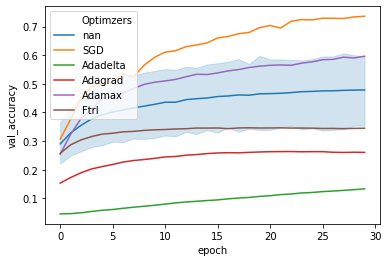

In [46]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimzers', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Backpropagation is when you run your weights back into your neural network in reverse order.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


